## k 近邻算法
k 近邻算法是对给定的一个训练数据集,对新的输入实例,在训练数据集中找到与该实例最近的 k 个实例,这 k 个实例的多数属于某个类,酒吧该输入分给这个类.  
模型三要素:
1. 距离度量
2. k 值选择
3. 分类决策规则  
  
  
* 距离度量  
特征空间中的两个实例点的距离是两个实例点的相似度的反应.通常的距离有个**欧氏距离**,**曼哈顿距离**,**$ L_p $ 距离**,**Minkowski 距离**
设特征空间 x 是 n 维实数向量空间 **$ R^n $**, **$ x_i,x_j \epsilon X,x_i=({x_i}^{(1)},{x_i}^{(2)},...,{x_i}^{(n)})^T,x_j=({x_j}^{(1)},{x_j}^{(2)},...,{x_j}^{(n)})^T $**,  

则 $ x_i,x_j $ 的 $ L_p $ 距离定义为  

$ L_p(x_i,x_j)=(\sum_{l=1}^{n}|{x_i}^{(l)}-{x_j}^{(l)}|^p)^{\frac{1}{p}} $  
当 p = 2 时为欧氏距离; 当 p = 1 时为曼哈顿距离
* k 值的选择  
k 值较小时学习的估计误差会增大,出现过拟合,k 值较大时学习的近似误差会增大,通常通过交叉验证法选取最优的 k 值大小
* 多数表决分类决策规则  
$ y = arg\underset{c_j}{max} \sum_{x_i\epsilon{N_k(x)}} I({y_i}={c_j}), i=1,2,3,...,N; j=1,2,3,...,K $

### 距离度量
* p = 1 曼哈顿距离
* p = 2 欧式距离
* p = inf 闵式距离

In [55]:
import math
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [2]:
def distance(x, y, p=2):
    """
    距离度量
    """
    if len(x) == len(y) and len(x) > 1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1 / p)
    else:
        return 0

In [3]:
distance([1,2,3,4,5],[5,6,7,8,9])

8.94427190999916

In [4]:
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

In [21]:
for i in range(1, 5):
    r = {'P={}-{}'.format(i, c):distance(x1, c, p=i) for c in [x2, x3]}
#     print(min(zip(r.values(), r.keys())))
    print('(distance, type-point):',[i for i in zip(r.values(), r.keys())])

(distance, type-point): [(4.0, 'P=1-[5, 1]'), (6.0, 'P=1-[4, 4]')]
(distance, type-point): [(4.0, 'P=2-[5, 1]'), (4.242640687119285, 'P=2-[4, 4]')]
(distance, type-point): [(3.9999999999999996, 'P=3-[5, 1]'), (3.7797631496846193, 'P=3-[4, 4]')]
(distance, type-point): [(4.0, 'P=4-[5, 1]'), (3.5676213450081633, 'P=4-[4, 4]')]


### Python 实现 K 近邻对鸢尾花的分类

In [29]:
# 加载数据
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

/home/dxigui/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


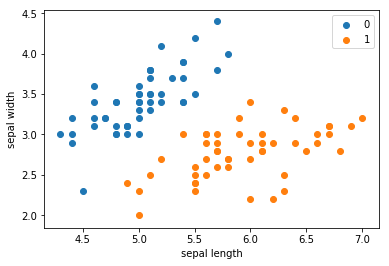

In [31]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [34]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
class KNN(object):
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X):
        knn_list = []
        for i in range(self.n):
            # np.linalg.norm(x, ord=None, axis=None, keepdims=False)
            # 通过 ord 指定返回 8 种不同的范式
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])
        
        knn = [k[-1] for k in knn_list]
        # 对每个进行计数,返回一个字典, 
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs, key=lambda x: x)[-1]
        return max_count
    
    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [79]:
test = KNN(X_train, y_train)
test.score(X_test, y_test)

X [5.5 2.3]
[(1.42126704035519, 0.0), (0.9219544457292886, 1.0), (1.442220510185596, 1.0)]
X [5.1 3.8]
[(0.6403124237432848, 0.0), (1.2806248474865696, 1.0), (1.7464249196572985, 1.0)]
X [5.1 3.8]
[(0.6403124237432848, 0.0), (1.2806248474865696, 1.0), (1.7464249196572985, 1.0)]
X [5.4 3.4]
[(0.8000000000000007, 0.0), (0.8062257748298542, 1.0), (1.334166406412633, 1.0)]
X [6.2 2.2]
[(2.0, 0.0), (0.8062257748298548, 1.0), (1.0295630140987, 1.0)]
X [5.5 2.6]
[(1.2041594578792296, 0.0), (0.7211102550927976, 1.0), (1.3, 1.0)]
X [5.2 3.5]
[(0.6082762530298225, 0.0), (1.0295630140986995, 1.0), (1.5524174696260025, 1.0)]
X [5.7 2.6]
[(1.3601470508735447, 0.0), (0.5656854249492376, 1.0), (1.118033988749895, 1.0)]
X [4.7 3.2]
[(0.22360679774997896, 0.0), (1.4142135623730945, 1.0), (2.0024984394500787, 1.0)]
X [4.9 3. ]
[(0.5000000000000003, 0.0), (1.1999999999999993, 1.0), (1.8027756377319946, 1.0)]
X [4.6 3.2]
[(0.19999999999999973, 0.0), (1.5132745950421556, 1.0), (2.102379604162864, 1.0)]
X [

1.0

SyntaxError: invalid syntax (<ipython-input-70-860b17c5d698>, line 1)

In [51]:
test_point = [6.0, 5.0]
print('Test Point: {}'.format(test.predict(test_point)))

Test Point: 0.0


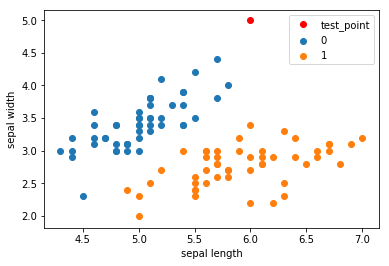

In [53]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'ro', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### Scikitlearn

In [57]:
sk_knn = KNeighborsClassifier()
sk_knn.fit(X_train, y_train)
sk_knn.score(X_test, y_test)

1.0

In [77]:
np.linalg.norm(np.array([5.5, 2.3]) - np.array([4.6, 3.4]))

1.42126704035519

In [80]:
Counter([1,1,2,3,1])

Counter({1: 3, 2: 1, 3: 1})

### kd 树

k 邻近通过线性扫描实现,当训练集过大时计算耗时.  
kd 树能结构存储训练数据,类似二叉树,可以减少计算次数.  
kd 树是对空间的一种划分,构造方法
* 随着树的深度轮流选择轴当作分割面.（例如：在三维空间中根节点是 x 轴垂直分割面，其子节点皆为 y 轴垂直分割面，
其孙节点皆为 z 轴垂直分割面，其曾孙节点则皆为 x 轴垂直分割面，依此类推。）
* 点由垂直分割面之轴座标的中位数区分并放入子树